In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [16]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [17]:
init_notebook_mode(connected=True)
cf.go_offline()

In [18]:
df=pd.read_csv('STEAMCOAL.csv')

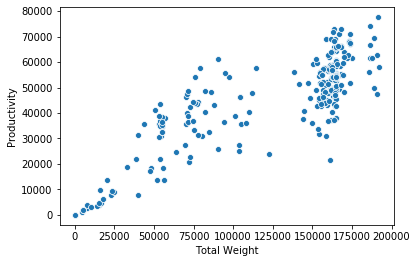

In [19]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [20]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.0,259.000000,259.000000,259.000000,2.420000e+02
mean,8802.494208,194028.142857,59.942703,89.390000,128079.625761,1.280811,0.128097,0.0,23.589923,2.522201,46068.161313,2.188925e+05
std,80.616538,3643.848627,28.058708,61.072848,52891.979300,0.528847,0.052885,0.0,44.175053,16.024735,16995.668133,1.060341e+06
min,8661.000000,190836.000000,0.000000,0.000000,-0.050000,0.000000,0.000000,0.0,0.000000,0.000000,-0.010000,1.670930e+02
25%,8735.500000,191569.000000,43.680000,62.150000,77900.000000,0.780000,0.078000,0.0,0.000000,0.000000,37194.750000,1.600600e+05
50%,8800.000000,192431.000000,66.300000,82.350000,159207.000000,1.590000,0.159000,0.0,6.670000,0.000000,49297.680000,1.660840e+05
75%,8871.500000,193210.500000,74.580000,106.965000,164994.500000,1.650000,0.165000,0.0,25.625000,0.000000,57808.810000,1.699853e+05
max,8947.000000,200902.000000,179.230000,422.420000,192201.000000,1.920000,0.192000,0.0,336.100000,149.380000,77596.350000,1.663351e+07


In [21]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lm.intercept_)

12476.61277520658


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.2623


In [25]:
predictions = lm.predict(X_test)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 7161.97573266699
MSE: 73003053.29680921
RMSE: 8544.182424129836
r2_score: 0.7965038049061801


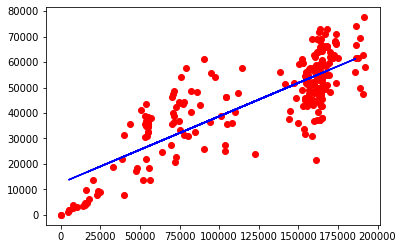

In [27]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [28]:
joblib.dump(lm,"Steam_Coal.pkl")

['Steam_Coal.pkl']